# Backstage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
# import pprint

import math

import scipy.stats as st

In [ ]:
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (22, 9)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Verdana', 'DejaVu Sans']
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams.keys()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# D25

In [ ]:
# n = 25
# p = 1/25

# n_iter = 10000

# rng = np.random.default_rng()

# chance_n = dict.fromkeys([str(i+1) + ' Dado(s)' for i in range(n)], 0)
# nomes = list(chance_n.keys())

# for i in range(n):
#     v_sucessos = np.zeros(n_iter)

#     for j in range(n_iter):
#         results = rng.random(size=i+1)
#         sucessos = results < p
#         sucesso = sucessos.any()
#         v_sucessos[j] = sucesso

#     pos = nomes[i]
#     chance_n[pos] = v_sucessos.mean()

# print('\n'.join([pos  + ': ' + str(round(chance_n[pos] * 100, 2)) + '%' for pos in nomes]))

# ICs

## 17 Dados

In [ ]:
# n = 1000

# p = 1/25

# n_iter = 100000

# rng = np.random.default_rng()

# chance_n = np.zeros(n)

# for i in range(n):
#     v_sucessos = np.zeros(n_iter)

#     for j in range(n_iter):
#         results = rng.random(size=17)
#         sucessos = results < p
#         sucesso = sucessos.any()
#         v_sucessos[j] = sucesso

#     chance_n[i] = v_sucessos.mean()

In [ ]:
# n = 1000

# p = 1/25

# n_iter = 100000

# rng = np.random.default_rng()

# chance_n = np.zeros(n)

# for i in range(n):
#     v_sucessos = np.zeros(n_iter)

#     for j in range(n_iter):
#         results = rng.random(size=17)
#         sucessos = results < p
#         sucesso = sucessos.any()
#         v_sucessos[j] = sucesso

#     chance_n[i] = v_sucessos.mean()
    
# x = chance_n

# ymin = 0

# n, bins, patches = plt.hist(x, bins=20, edgecolor='k')

# plt.vlines(x.mean(), ymin, n.max(), label='Média', edgecolor='k', color='r')
# plt.vlines(np.median(x), ymin, n.max(), label='Mediana', color='g')

# LI = np.percentile(x, 2.5)
# LS = np.percentile(x, 97.5)

# plt.vlines(LI, ymin, n.max(), linestyles='--', label='Intervalo de Confiança', color='m')
# plt.vlines(LS, ymin, n.max(), linestyles='--', edgecolor='m')

# plt.xlabel('Chance')
# plt.ylabel('# de Resultados')
# plt.title('Distribuição de Probabilidade')

# plt.legend()

# despine()

# plt.show()

## 16, 17 e 18 Dados

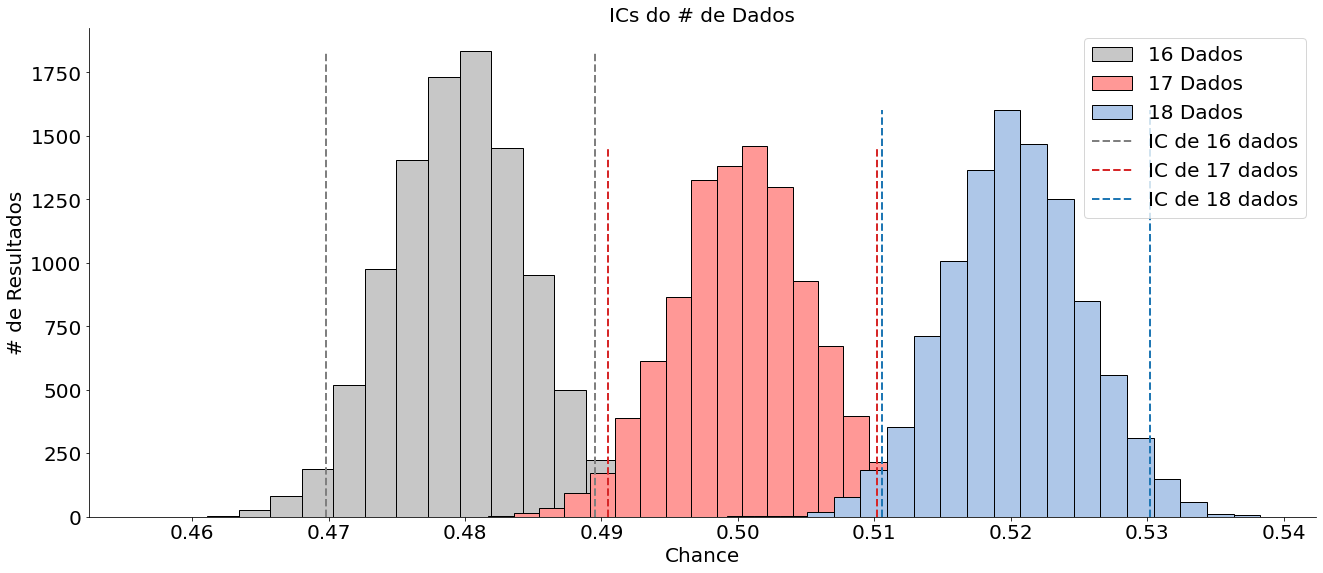

In [ ]:
# Colocar vlines de média e mediana igual acima

n = 10000

p = 1/25

n_iter = 10000

rng = np.random.default_rng()

vet = [16, 17, 18]
n_vet = range(len(vet))
chance_n = np.zeros((n, n_vet))

for i in n_vet:
    for j in range(n):
        v_sucessos = np.zeros(n_iter)

        for k in range(n_iter):
            results = rng.random(size=vet[i])
            sucessos = results < p
            sucesso = sucessos.any()
            v_sucessos[k] = sucesso

        chance_n[j, i] = v_sucessos.mean()
    
chance_n

ymin = 0

vetor = np.linspace(0, 1, 20)[[4, 5, 12, 13, 18, 19]]
color = iter(cm.tab20_r(vetor))

for i in n_vet:
    LI = np.percentile(chance_n[:, i], 2.5)
    LS = np.percentile(chance_n[:, i], 97.5)

    c = next(color)
    n, bins, patches = plt.hist(chance_n[:, i], bins=20, edgecolor='k', label=str(vet[i]) + ' Dados', color=c)
    # n, bins, patches = plt.hist(x_graph, bins=20, edgecolor='k', label=str(vet[i]) + ' Dados')

    maior = n.max()

    c = next(color)
    plt.vlines(LI, ymin, maior, linestyles='--', label='IC de ' + str(vet[i]) + ' dados', color=c)
    plt.vlines(LS, ymin, maior, linestyles='--', color=c)

plt.xlabel('Chance')
plt.ylabel('# de Resultados')
plt.title('ICs do # de Dados')

plt.legend()

despine()

plt.show()

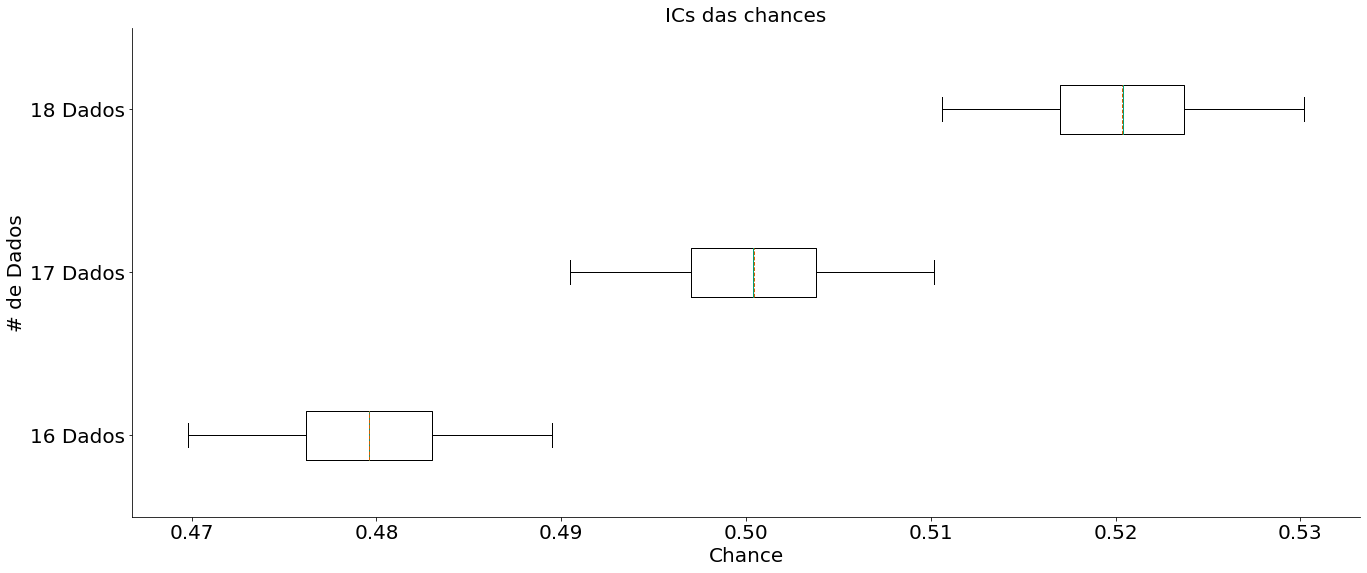

In [ ]:
labels = [str(i) + ' Dados' for i in vet]
plt.boxplot(chance_n, sym='', vert=False, whis=[2.5, 97.5], labels=labels, showmeans=True, meanline=True)

plt.xlabel('Chance')
plt.ylabel('# de Dados')
plt.title('ICs das chances')

despine()

plt.show()

In [ ]:
chance_n_mean = chance_n.mean(axis=0)

print('\n'.join([str(vet[i])  + ': ' + str(round(chance_n[i] * 100, 2)) + '%' for i in n_vet]))

16: 47.96%
17: 50.04%
18: 52.04%
